# Importing the neccessary libraries

In [261]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [262]:
df_fc = pd.read_csv('Fraud_check.csv')
df_fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [263]:
df_fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [264]:
df_fc.rename(columns = {'Taxable.Income':'Taxable_income'}, inplace = True)

In [265]:
df_fc

,Undergrad,Marital.Status,Taxable_income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [266]:
df_fc['Undergrad'].replace(to_replace=['YES', 'NO'], value=['0', '1'], inplace=True)

In [267]:
df_fc

,Undergrad,Marital.Status,Taxable_income,City.Population,Work.Experience,Urban
0,1,Single,68833,50047,10,YES
1,0,Divorced,33700,134075,18,YES
2,1,Married,36925,160205,30,YES
3,0,Single,50190,193264,15,YES
4,1,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,0,Divorced,76340,39492,7,YES
596,0,Divorced,69967,55369,2,YES
597,1,Divorced,47334,154058,0,YES
598,0,Married,98592,180083,17,NO


In [268]:
df_fc['Urban'].replace(to_replace=['YES', 'NO'], value=['0', '1'], inplace=True)

In [269]:
df_fc

,Undergrad,Marital.Status,Taxable_income,City.Population,Work.Experience,Urban
0,1,Single,68833,50047,10,0
1,0,Divorced,33700,134075,18,0
2,1,Married,36925,160205,30,0
3,0,Single,50190,193264,15,0
4,1,Married,81002,27533,28,1
...,...,...,...,...,...,...
595,0,Divorced,76340,39492,7,0
596,0,Divorced,69967,55369,2,0
597,1,Divorced,47334,154058,0,0
598,0,Married,98592,180083,17,1


In [270]:
df_fc.rename(columns = {'Marital.Status':'Marital_status'}, inplace = True)
df_fc['Marital_status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [271]:
df_fc['Marital_status'], class_names = pd.factorize(df_fc['Marital_status'])
df_fc.Marital_status

0      0
1      1
2      2
3      0
4      2
      ..
595    1
596    1
597    1
598    2
599    1
Name: Marital_status, Length: 600, dtype: int64

## Converting Taxable feature into categorical type

In [272]:

taxable_inc = pd.cut(df_fc.Taxable_income, bins=[0, 30000, 100000], labels=['Risky', 'Good'])

df_fc.drop(['Taxable_income'], axis=1, inplace=True)
df_fc.insert(0, 'Taxable_income', taxable_inc)

df_fc

,Taxable_income,Undergrad,Marital_status,City.Population,Work.Experience,Urban
0,Good,1,0,50047,10,0
1,Good,0,1,134075,18,0
2,Good,1,2,160205,30,0
3,Good,0,0,193264,15,0
4,Good,1,2,27533,28,1
...,...,...,...,...,...,...
595,Good,0,1,39492,7,0
596,Good,0,1,55369,2,0
597,Good,1,1,154058,0,0
598,Good,0,2,180083,17,1


In [273]:
df_fc.isna().sum()

Taxable_income     0
Undergrad          0
Marital_status     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

## Detection of outlier using Isolation forest

In [274]:
from sklearn.ensemble import IsolationForest

In [275]:
df_copy = df_fc.copy()
data_encoded = pd.get_dummies(df_copy)

### Training the model

In [276]:
clf = IsolationForest(random_state=10, contamination=0.01)
clf.fit(data_encoded)

IsolationForest(contamination=0.01, random_state=10)

### Predictions

In [277]:
y_pred_outliers = clf.predict(data_encoded)

data_encoded

,Marital_status,City.Population,Work.Experience,Taxable_income_Risky,Taxable_income_Good,Undergrad_0,Undergrad_1,Urban_0,Urban_1
0,0,50047,10,0,1,0,1,1,0
1,1,134075,18,0,1,1,0,1,0
2,2,160205,30,0,1,0,1,1,0
3,0,193264,15,0,1,1,0,1,0
4,2,27533,28,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,1,0,1,0
596,1,55369,2,0,1,1,0,1,0
597,1,154058,0,0,1,0,1,1,0
598,2,180083,17,0,1,1,0,0,1


In [278]:
data_encoded['scores'] = clf.decision_function(data_encoded)

In [279]:
data_encoded['anomaly'] = clf.predict(data_encoded.iloc[:, 0:9])
data_encoded

,Marital_status,City.Population,Work.Experience,Taxable_income_Risky,Taxable_income_Good,Undergrad_0,Undergrad_1,Urban_0,Urban_1,scores,anomaly
0,0,50047,10,0,1,0,1,1,0,0.113378,1
1,1,134075,18,0,1,1,0,1,0,0.134529,1
2,2,160205,30,0,1,0,1,1,0,0.051150,1
3,0,193264,15,0,1,1,0,1,0,0.103444,1
4,2,27533,28,0,1,0,1,0,1,0.075791,1
...,...,...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,1,0,1,0,0.102491,1
596,1,55369,2,0,1,1,0,1,0,0.091557,1
597,1,154058,0,0,1,0,1,1,0,0.079812,1
598,2,180083,17,0,1,1,0,0,1,0.117919,1


### Print the outlier data points

In [280]:
data_encoded[data_encoded['anomaly']==-1]

,Marital_status,City.Population,Work.Experience,Taxable_income_Risky,Taxable_income_Good,Undergrad_0,Undergrad_1,Urban_0,Urban_1,scores,anomaly
21,1,29106,7,1,0,1,0,1,0,-0.000240,-1
34,1,183767,1,1,0,1,0,1,0,-0.000150,-1
196,2,28410,21,1,0,1,0,0,1,-0.002185,-1
259,2,197841,7,1,0,0,1,0,1,-0.011481,-1
280,1,33184,1,1,0,0,1,0,1,-0.013653,-1
356,2,46480,27,1,0,0,1,0,1,-0.005965,-1


In [281]:
df_fc.drop([21, 34, 196, 259, 280, 356], inplace=True)
df_fc

,Taxable_income,Undergrad,Marital_status,City.Population,Work.Experience,Urban
0,Good,1,0,50047,10,0
1,Good,0,1,134075,18,0
2,Good,1,2,160205,30,0
3,Good,0,0,193264,15,0
4,Good,1,2,27533,28,1
...,...,...,...,...,...,...
595,Good,0,1,39492,7,0
596,Good,0,1,55369,2,0
597,Good,1,1,154058,0,0
598,Good,0,2,180083,17,1


### Buid decision tree classifier C5.0 using entropy criteria

In [282]:
df_fc['Taxable_income'].unique().value_counts()

Risky    1
Good     1
dtype: int64

### Splitting data into feature and class

In [283]:
x = df_fc.iloc[:,1:]
y = df_fc['Taxable_income']
x

,Undergrad,Marital_status,City.Population,Work.Experience,Urban
0,1,0,50047,10,0
1,0,1,134075,18,0
2,1,2,160205,30,0
3,0,0,193264,15,0
4,1,2,27533,28,1
...,...,...,...,...,...
595,0,1,39492,7,0
596,0,1,55369,2,0
597,1,1,154058,0,0
598,0,2,180083,17,1


In [284]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable_income, Length: 594, dtype: category
Categories (2, object): ['Risky' < 'Good']

### Split data into train and test

In [285]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [286]:
# Model

model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [287]:
df_fc.columns

Index(['Taxable_income', 'Undergrad', 'Marital_status', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

[Text(0.4, 0.9, 'City.Population <= 78967.0\nentropy = 0.692\nsamples = 415\nvalue = [338, 77]\nclass = Risky'),
 Text(0.2, 0.7, 'City.Population <= 74803.5\nentropy = 0.57\nsamples = 141\nvalue = [122, 19]\nclass = Risky'),
 Text(0.15, 0.5, 'City.Population <= 74597.0\nentropy = 0.609\nsamples = 127\nvalue = [108, 19]\nclass = Risky'),
 Text(0.1, 0.3, 'City.Population <= 72611.5\nentropy = 0.592\nsamples = 126\nvalue = [108, 18]\nclass = Risky'),
 Text(0.05, 0.1, 'entropy = 0.626\nsamples = 115\nvalue = [97, 18]\nclass = Risky'),
 Text(0.15, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = Risky'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Good'),
 Text(0.25, 0.5, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = Risky'),
 Text(0.6, 0.7, 'City.Population <= 138627.0\nentropy = 0.745\nsamples = 274\nvalue = [216, 58]\nclass = Risky'),
 Text(0.4, 0.5, 'City.Population <= 125133.5\nentropy = 0.855\nsamples = 143\nvalue = [103, 40]\nclass = Risky

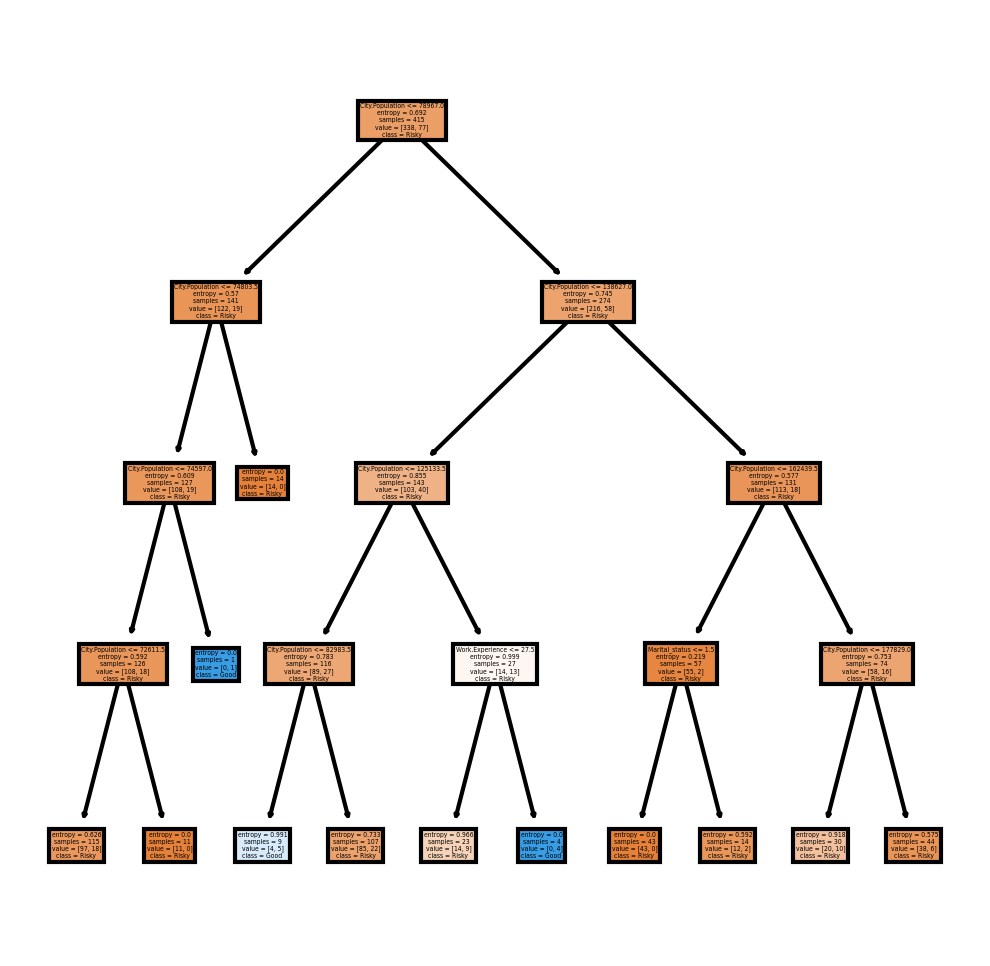

In [288]:
# Plot the tree

fn = [ 'Undergrad', 'Marital_status', 'City.Population',
       'Work.Experience', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)

## Predicting on test data

In [289]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good     174
Risky      5
dtype: int64

In [290]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
   

In [291]:
pd.crosstab(y_test, preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
Taxable_income,,
Risky,40,1
Good,134,4


In [292]:
# Accuracy

np.mean(preds==y_test)

0.7541899441340782

## Decision tree classifier CART using Gini criteria

In [293]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [294]:
# Prediction and computing the accuracy

pred = model_gini.predict(x_test)
np.mean(pred==y_test)

0.7430167597765364

### Plotting the tree

[Text(0.49107142857142855, 0.9, 'City.Population <= 78967.0\ngini = 0.302\nsamples = 415\nvalue = [338, 77]\nclass = Risky'),
 Text(0.26785714285714285, 0.7, 'City.Population <= 72611.5\ngini = 0.233\nsamples = 141\nvalue = [122, 19]\nclass = Risky'),
 Text(0.14285714285714285, 0.5, 'City.Population <= 71429.5\ngini = 0.264\nsamples = 115\nvalue = [97, 18]\nclass = Risky'),
 Text(0.07142857142857142, 0.3, 'Work.Experience <= 24.5\ngini = 0.245\nsamples = 112\nvalue = [96, 16]\nclass = Risky'),
 Text(0.03571428571428571, 0.1, 'gini = 0.283\nsamples = 88\nvalue = [73, 15]\nclass = Risky'),
 Text(0.10714285714285714, 0.1, 'gini = 0.08\nsamples = 24\nvalue = [23, 1]\nclass = Risky'),
 Text(0.21428571428571427, 0.3, 'City.Population <= 72183.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Good'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Good'),
 Text(0.25, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Risky'),
 Text(0.39285714285714285

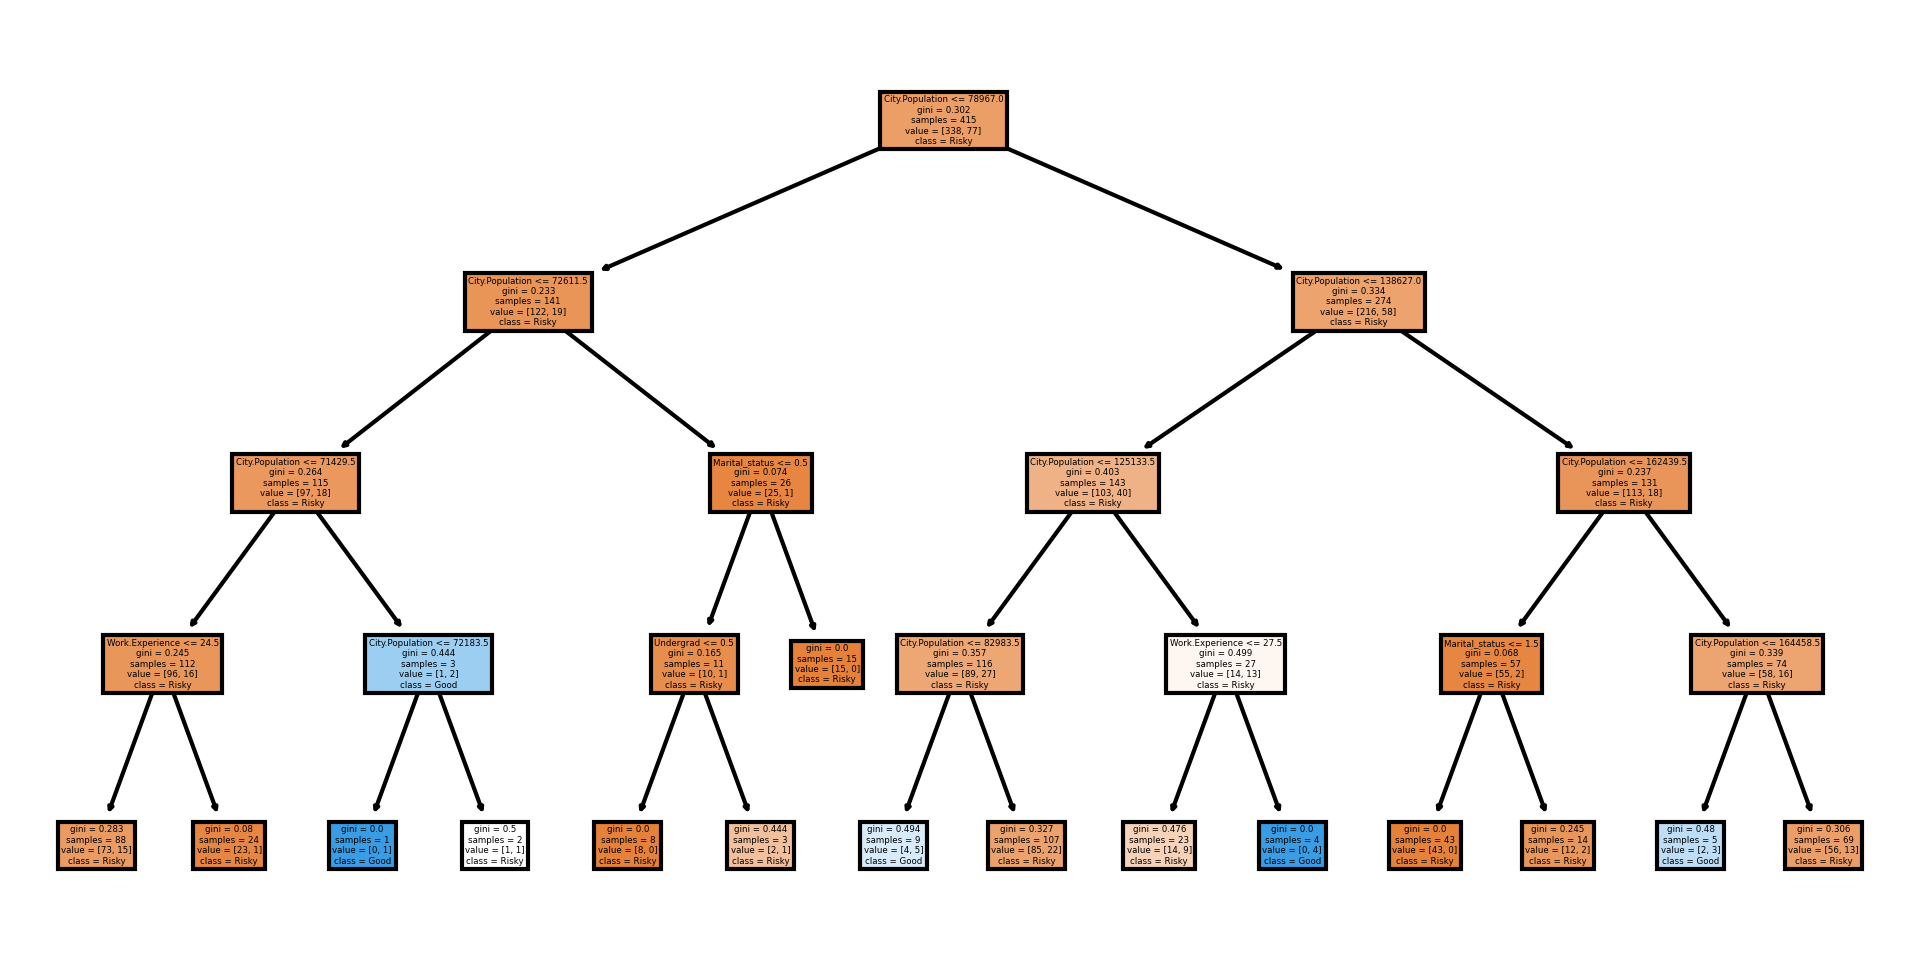

In [295]:


fn = [ 'Undergrad', 'Marital_status', 'City.Population',
       'Work.Experience', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True)